In [152]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [ ]:
df = pd.read_excel(r'D:\AI\Projects\project_1\customer_churn_large_dataset.xlsx')
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [154]:
df.sample(8)

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
46080,46081,Customer_46081,58,Male,Chicago,6,38.19,189,1
53519,53520,Customer_53520,43,Male,Los Angeles,2,69.57,65,0
65943,65944,Customer_65944,48,Female,Houston,18,64.46,492,0
34317,34318,Customer_34318,26,Female,Chicago,9,83.79,139,1
2086,2087,Customer_2087,50,Male,Miami,9,71.33,424,0
90100,90101,Customer_90101,44,Female,Houston,8,43.94,278,0
87617,87618,Customer_87618,52,Female,Houston,6,41.20,263,0
66510,66511,Customer_66511,25,Female,Houston,13,63.33,198,0


In [155]:
df.shape        

(100000, 9)

In [156]:
df.columns

Index(['CustomerID', 'Name', 'Age', 'Gender', 'Location',
       'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB',
       'Churn'],
      dtype='object')

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


In [158]:
df.isna().sum()/len(df)*100

CustomerID                    0.0
Name                          0.0
Age                           0.0
Gender                        0.0
Location                      0.0
Subscription_Length_Months    0.0
Monthly_Bill                  0.0
Total_Usage_GB                0.0
Churn                         0.0
dtype: float64

In [159]:
df.duplicated().sum()

0

In [160]:
df.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


In [161]:
# Statistical summary of categoical variables

df.describe(include=['object'])

,Name,Gender,Location
count,100000,100000,100000
unique,100000,2,5
top,Customer_1,Female,Houston
freq,1,50216,20157


In [162]:
df['Gender'].value_counts()

Gender
Female    50216
Male      49784
Name: count, dtype: int64

In [163]:
df['Location'].value_counts()

Location
Houston        20157
Los Angeles    20041
Miami          20031
Chicago        19958
New York       19813
Name: count, dtype: int64

In [164]:
print(df.columns)

Index(['CustomerID', 'Name', 'Age', 'Gender', 'Location',
       'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB',
       'Churn'],
      dtype='object')


In [165]:
df.select_dtypes(include='number').corr()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
CustomerID,1.000000,-0.001085,0.005444,0.001265,-0.004025,-0.004586
Age,-0.001085,1.000000,0.003382,0.001110,0.001927,0.001559
Subscription_Length_Months,0.005444,0.003382,1.000000,-0.005294,-0.002203,0.002328
Monthly_Bill,0.001265,0.001110,-0.005294,1.000000,0.003187,-0.000211
Total_Usage_GB,-0.004025,0.001927,-0.002203,0.003187,1.000000,-0.002842
Churn,-0.004586,0.001559,0.002328,-0.000211,-0.002842,1.000000


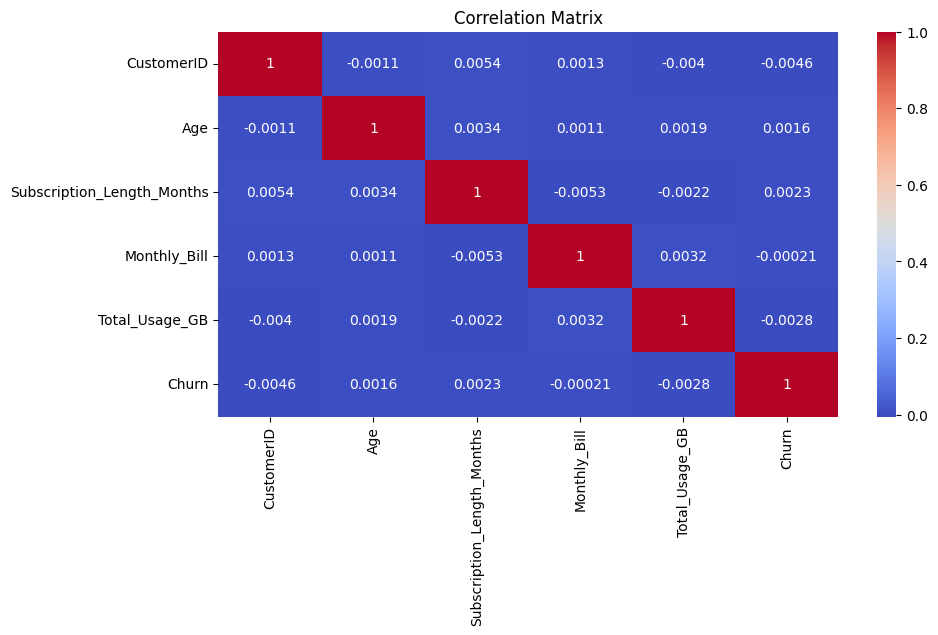

In [166]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [167]:
df.drop(columns=['CustomerID', 'Name'],axis=1,inplace=True)

In [168]:
df.columns

Index(['Age', 'Gender', 'Location', 'Subscription_Length_Months',
       'Monthly_Bill', 'Total_Usage_GB', 'Churn'],
      dtype='object')

In [169]:
# Check for typo's & suspicious values and rechecking dataset 

for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}': {unique_values}")
    print()

missing_values = df.isnull().sum()
data_types = df.dtypes

print('-'*50)
print("Missing values:")
print(missing_values)
print()

x = df.duplicated().sum()
print('-'*50)
print("Duplicate values:", x)
print()


y = df.shape
print('-'*50)
print("Shape of Dataset:", y)
print()

z = df.columns
print('-'*50)
print("Columns of Datset:", z)
print()

print('-'*50)
print("\nData types:")
print(data_types)
print()

Unique values in 'Age': [63 62 24 36 46 67 30 20 53 50 44 34 28 42 55 43 31 41 58 64 70 18 25 27
 66 29 60 26 45 19 37 49 38 57 47 48 40 21 33 51 35 69 61 52 39 56 59 65
 22 54 68 32 23]

Unique values in 'Gender': ['Male' 'Female']

Unique values in 'Location': ['Los Angeles' 'New York' 'Miami' 'Chicago' 'Houston']

Unique values in 'Subscription_Length_Months': [17  1  5  3 19 15 10 12 20 13  8 23  2  4 18  9 14 16  6  7 24 22 11 21]

Unique values in 'Monthly_Bill': [73.36 48.76 85.47 ... 75.21 41.98 83.55]

Unique values in 'Total_Usage_GB': [236 172 460 297 266 456 269 396 150 383 442 295 148 239 233 231 198 354
 429 243 270 389 226 393  89 183 135 185 151 115 194 278 423 202 495 162
 101 294 122 305 212 220 253 411 447 218 221 166  64  67 391 232 298 334
 326 459 371 299 376 214 329  50 444 113  76 134 184 319 235  85 332  73
 369 308 446 321  83 114 296 102 215 169 225 140  84 463 402 468 375 366
 404 471 204 320 178 149 361 304 281 177 117 137 322 427 403 237 439 336
 344 288 2

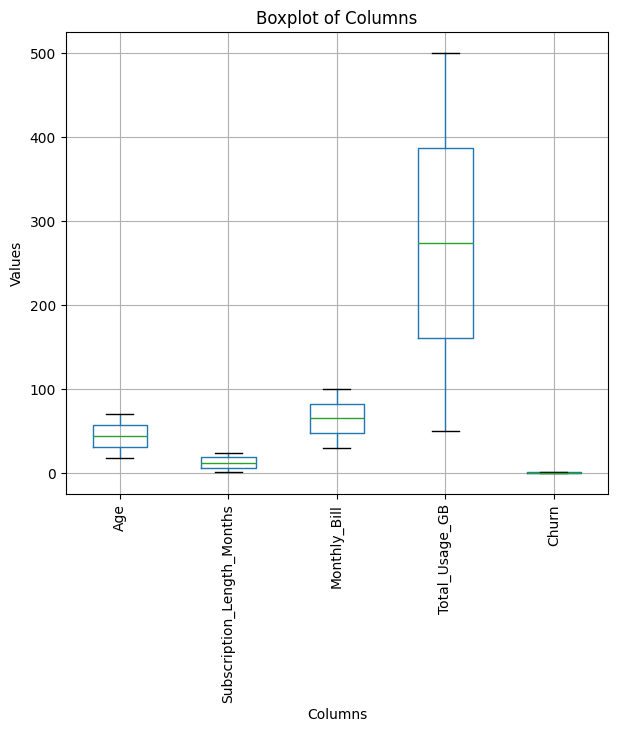

In [170]:
# Adjust figure size based on the number of columns
num_columns = len(df.columns)
fig, ax = plt.subplots(figsize=(10, 6))
if num_columns > 16:
    fig.set_size_inches(10, num_columns * 0.6)
else:
    fig.set_size_inches(num_columns, 6)

# Create a boxplot for each column
df.boxplot(ax=ax)

# Set the title and labels
plt.title("Boxplot of Columns")
plt.xlabel("Columns")
plt.ylabel("Values")

# Rotate the x-axis labels for better readability (optional)
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [ ]:
# Make a copy of cleaned data

df_cleaned = df.copy()

In [172]:
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns

Index(['Gender', 'Location'], dtype='object')

In [173]:
df = pd.get_dummies(df, columns=['Gender', 'Location'], drop_first = True)

In [174]:
df.head()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Gender_Male,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
0,63,17,73.36,236,0,True,False,True,False,False
1,62,1,48.76,172,0,False,False,False,False,True
2,24,5,85.47,460,0,False,False,True,False,False
3,36,3,97.94,297,1,False,False,False,True,False
4,46,19,58.14,266,0,False,False,False,True,False


In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Age                         100000 non-null  int64  
 1   Subscription_Length_Months  100000 non-null  int64  
 2   Monthly_Bill                100000 non-null  float64
 3   Total_Usage_GB              100000 non-null  int64  
 4   Churn                       100000 non-null  int64  
 5   Gender_Male                 100000 non-null  bool   
 6   Location_Houston            100000 non-null  bool   
 7   Location_Los Angeles        100000 non-null  bool   
 8   Location_Miami              100000 non-null  bool   
 9   Location_New York           100000 non-null  bool   
dtypes: bool(5), float64(1), int64(4)
memory usage: 4.3 MB


In [176]:
df.shape

(100000, 10)

In [177]:
# Select appropriate bin size using sturges_rule

import math

def sturges_rule(num_data_points):
    k = 1 + math.log2(num_data_points)
    return int(k)

# Example usage
num_data_points = 100000
bins = sturges_rule(num_data_points)
print("Number of bins according to Sturges' Rule:", bins)

Number of bins according to Sturges' Rule: 17


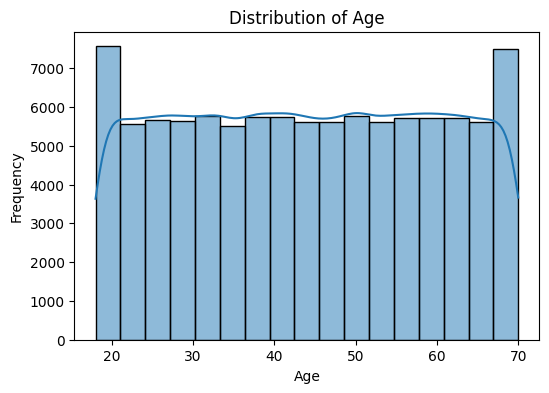

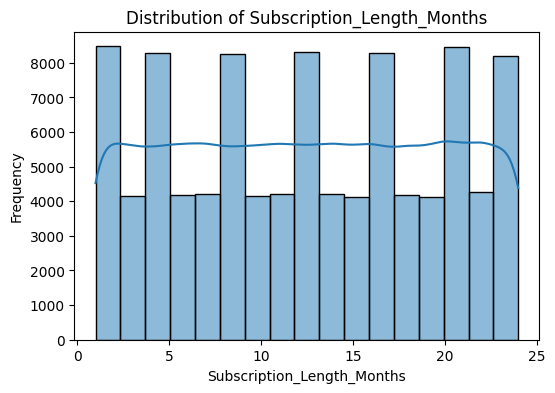

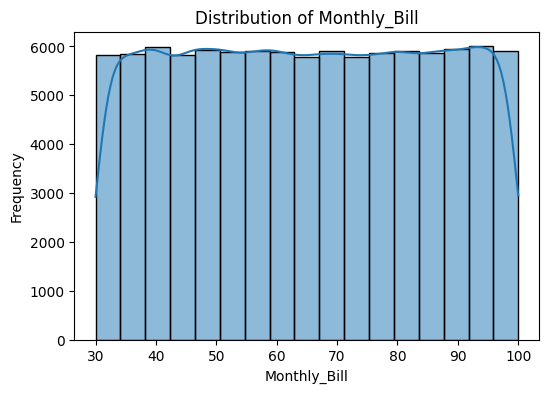

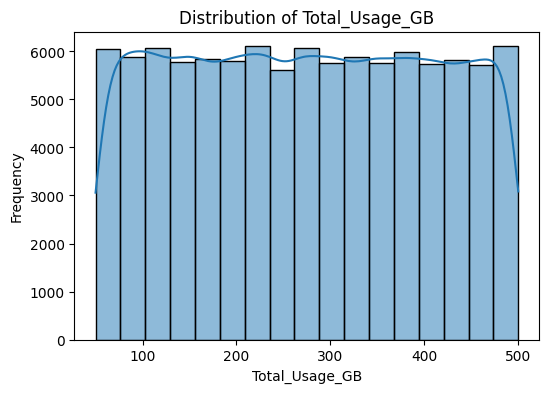

In [178]:
# check distribution of all continuous variables
continuous_vars = df.select_dtypes(include=['float64', 'int64']).columns

# Exclude binary variables from the list
binary_vars = [var for var in continuous_vars if df[var].nunique() == 2]

# Exclude binary variables from the continuous variables
continuous_vars = [var for var in continuous_vars if var not in binary_vars]

# Plot the distribution of each continuous variable
for var in continuous_vars:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=var, bins=17, kde=True)
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {var}')
    plt.show()

In [179]:
# check skewness of all continuous variables
df[continuous_vars].skew()

Age                          -0.002689
Subscription_Length_Months   -0.001655
Monthly_Bill                 -0.000326
Total_Usage_GB                0.007113
dtype: float64

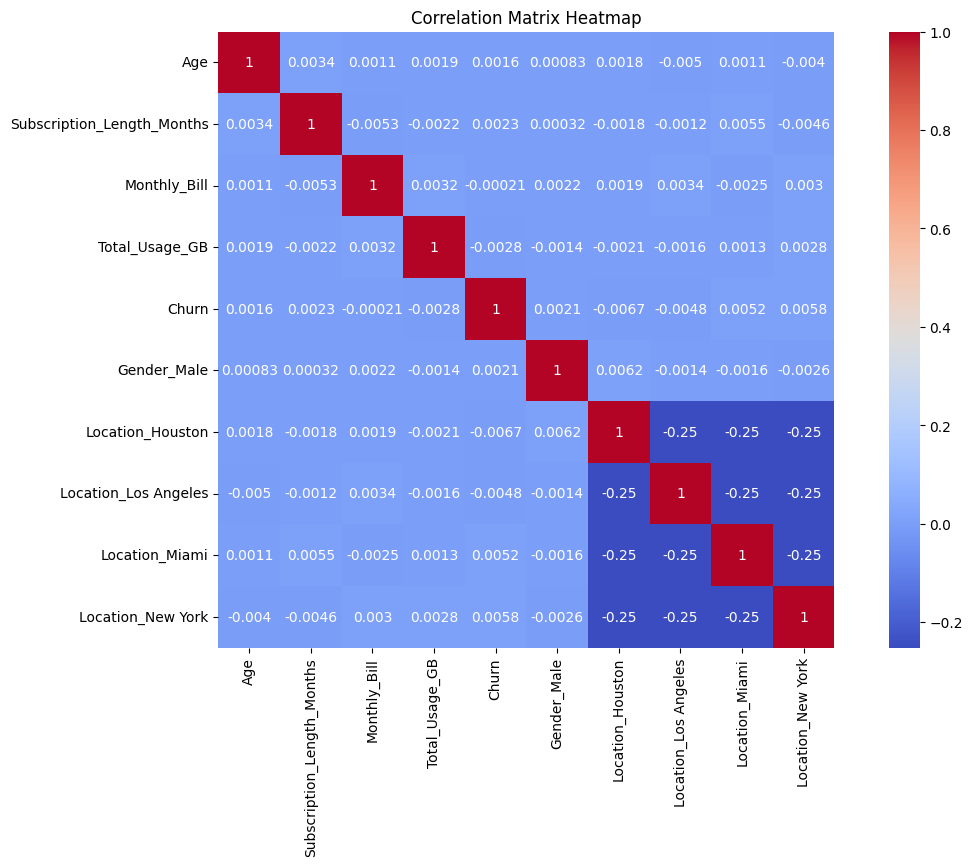

In [180]:
#checking colinearity between variables

corr_matrix = df.corr()

plt.figure(figsize=(14,8)) #(width,height)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [181]:
x = df.drop("Churn",axis=1)
y = df['Churn']

In [182]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [183]:
X_train.shape, y_train.shape

((70000, 9), (70000,))

In [184]:
X_test.shape, y_test.shape

((30000, 9), (30000,))

In [185]:
df.head()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Gender_Male,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
0,63,17,73.36,236,0,True,False,True,False,False
1,62,1,48.76,172,0,False,False,False,False,True
2,24,5,85.47,460,0,False,False,True,False,False
3,36,3,97.94,297,1,False,False,False,True,False
4,46,19,58.14,266,0,False,False,False,True,False


In [186]:
columns_to_check = df.columns
columns_needs_to_be_scaled = []

for column in columns_to_check:
    if (df[column] > 1).any() or (df[column] < 0).any():
        columns_needs_to_be_scaled.append(column)

print("Columns with values greater than 1 or less than 0:")
print(columns_needs_to_be_scaled)

Columns with values greater than 1 or less than 0:
['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB']


In [187]:
from sklearn.preprocessing import MinMaxScaler

columns_to_scale = ['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB']

scaler = MinMaxScaler()

X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])

X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

In [188]:
X_train.head()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Gender_Male,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
76513,0.134615,0.521739,0.973425,0.928889,True,False,True,False,False
60406,0.692308,0.043478,0.598657,0.740000,False,True,False,False,False
27322,0.269231,0.826087,0.509358,0.837778,True,False,False,False,False
53699,0.826923,0.478261,0.760109,0.031111,False,True,False,False,False
65412,1.000000,0.173913,0.170453,0.108889,False,False,False,False,True


In [189]:
X_test.head()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Gender_Male,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
75721,0.576923,0.434783,0.835548,0.982222,False,True,False,False,False
80184,0.596154,0.521739,0.151593,0.828889,True,False,False,False,True
19864,0.250000,0.173913,0.043006,0.502222,False,False,True,False,False
76699,0.673077,0.130435,0.923846,0.642222,True,False,False,False,True
92991,0.096154,1.000000,0.745964,0.564444,False,False,True,False,False


In [190]:
class_counts = df['Churn'].value_counts()
class_counts

Churn
0    50221
1    49779
Name: count, dtype: int64

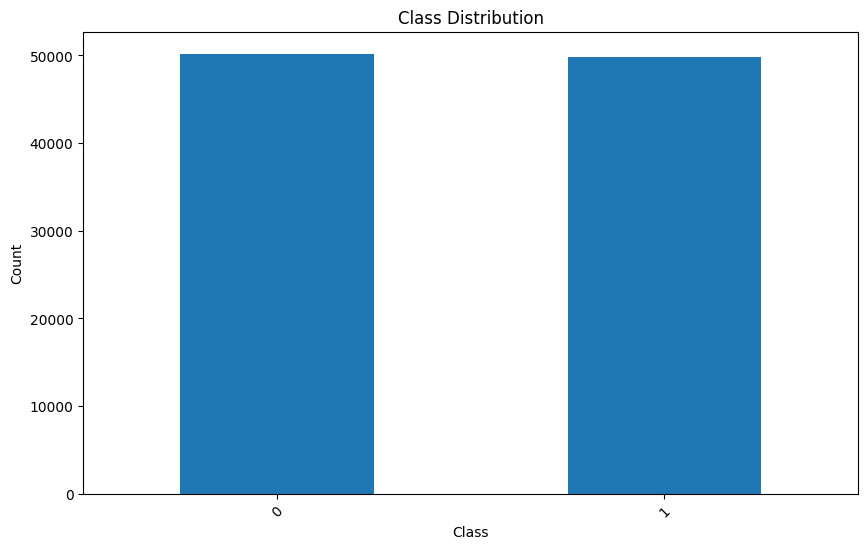

In [191]:
plt.figure(figsize=(10, 6)) 
class_counts.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [192]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_jobs=-1, random_state=42)

rf_classifier.fit(X_train, y_train)

importances = rf_classifier.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

feature_importance_df

,Feature,Importance
0,Monthly_Bill,0.316383
1,Total_Usage_GB,0.290353
2,Age,0.194396
3,Subscription_Length_Months,0.142624
4,Gender_Male,0.016683
5,Location_Los Angeles,0.010595
6,Location_Houston,0.010007
7,Location_Miami,0.009792
8,Location_New York,0.009166


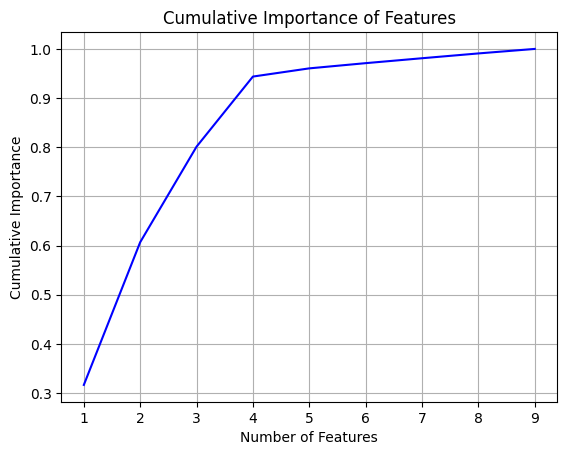

In [193]:
#check optimal number of features

sorted_indices = np.argsort(importances)[::-1]
cumulative_importance = np.cumsum(importances[sorted_indices])

plt.plot(range(1, len(importances) + 1), cumulative_importance, 'b-')
plt.xlabel('Number of Features')
plt.ylabel('Cumulative Importance')
plt.title('Cumulative Importance of Features')
plt.grid(True)
plt.show()

In [199]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["Variable"] = X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif = vif.sort_values(by='VIF', ascending=False)

vif

,Variable,VIF
2,Monthly_Bill,3.055120
3,Total_Usage_GB,3.043256
0,Age,3.002887
1,Subscription_Length_Months,2.922424


In [203]:
#importing algorithms, metrics and time

import time

from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier

In [204]:
algorithms = [
    LogisticRegression(n_jobs=-1, random_state=42),
    DecisionTreeClassifier(random_state=42),
    KNeighborsClassifier(n_jobs=-1),
    GaussianNB(),
    AdaBoostClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42),
    RandomForestClassifier(n_jobs=-1, random_state=42),
    XGBClassifier(n_jobs=-1, random_state=42),
    SVC(random_state=42)
]

# Initialize the results dictionary for training data
results_train = {
    'Algorithm': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-score': [],
    'Building Time (s)': []
}

# Apply the algorithms and calculate performance metrics for training data
for algorithm in algorithms:
    start_time = time.time()  # Start timer

    algorithm_name = type(algorithm).__name__
    algorithm.fit(X_train, y_train)
    y_train_pred = algorithm.predict(X_train)

    accuracy = accuracy_score(y_train, y_train_pred)
    precision = precision_score(y_train, y_train_pred, average='weighted')
    recall = recall_score(y_train, y_train_pred, average='weighted')
    f1 = f1_score(y_train, y_train_pred, average='weighted')

    end_time = time.time()  # End timer
    building_time = end_time - start_time

    results_train['Algorithm'].append(algorithm_name)
    results_train['Accuracy'].append(accuracy)
    results_train['Precision'].append(precision)
    results_train['Recall'].append(recall)
    results_train['F1-score'].append(f1)
    results_train['Building Time (s)'].append(building_time)

# Create a dataframe for the training data results
df_train = pd.DataFrame(results_train)
df_train

,Algorithm,Accuracy,Precision,Recall,F1-score,Building Time (s)
0,LogisticRegression,0.503400,0.503356,0.503400,0.496215,28.060200
1,DecisionTreeClassifier,1.000000,1.000000,1.000000,1.000000,0.930707
2,KNeighborsClassifier,0.686600,0.686602,0.686600,0.686596,4.064364
3,GaussianNB,0.501486,0.501325,0.501486,0.493915,0.062367
4,AdaBoostClassifier,0.508700,0.508998,0.508700,0.501191,2.414975
5,GradientBoostingClassifier,0.538557,0.538573,0.538557,0.538399,10.839571
6,RandomForestClassifier,1.000000,1.000000,1.000000,1.000000,10.576886
7,XGBClassifier,0.660357,0.660365,0.660357,0.660347,1.258758
8,SVC,0.517714,0.517997,0.517714,0.514748,748.528983


In [207]:
results_test = {
    'Algorithm': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-score': []
}

# Apply the algorithms and calculate performance metrics for test data
for algorithm in algorithms:
    algorithm_name = type(algorithm).__name__

    # Align test set columns to training set columns
    X_test_aligned = X_test.reindex(columns=X_train.columns, fill_value=0)

    y_test_pred = algorithm.predict(X_test_aligned)

    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, average='weighted')
    recall = recall_score(y_test, y_test_pred, average='weighted')
    f1 = f1_score(y_test, y_test_pred, average='weighted')

    results_test['Algorithm'].append(algorithm_name)
    results_test['Accuracy'].append(accuracy)
    results_test['Precision'].append(precision)
    results_test['Recall'].append(recall)
    results_test['F1-score'].append(f1)

# Create a dataframe for the test data results
df_test = pd.DataFrame(results_test)
df_test


,Algorithm,Accuracy,Precision,Recall,F1-score
0,LogisticRegression,0.498600,0.497328,0.498600,0.491694
1,DecisionTreeClassifier,0.500700,0.500661,0.500700,0.500673
2,KNeighborsClassifier,0.497900,0.497918,0.497900,0.497907
3,GaussianNB,0.499333,0.498084,0.499333,0.492268
4,AdaBoostClassifier,0.499967,0.498741,0.499967,0.492792
5,GradientBoostingClassifier,0.502000,0.501906,0.502000,0.501909
6,RandomForestClassifier,0.501567,0.501390,0.501567,0.501322
7,XGBClassifier,0.500933,0.500908,0.500933,0.500918
8,SVC,0.501767,0.501045,0.501767,0.498682


In [210]:
X_train = X_train[['Monthly_Bill', 'Total_Usage_GB', 'Age', 'Subscription_Length_Months']]

X_test = X_test[['Monthly_Bill', 'Total_Usage_GB', 'Age', 'Subscription_Length_Months']]

In [211]:
print('X_train columns:', X_train.columns)
print('-'*120)
print('X_test columns:', X_test.columns)

X_train columns: Index(['Monthly_Bill', 'Total_Usage_GB', 'Age', 'Subscription_Length_Months'], dtype='object')
------------------------------------------------------------------------------------------------------------------------
X_test columns: Index(['Monthly_Bill', 'Total_Usage_GB', 'Age', 'Subscription_Length_Months'], dtype='object')


In [212]:
algorithms = [
    LogisticRegression(n_jobs=-1, random_state=42),
    DecisionTreeClassifier(random_state=42),
    KNeighborsClassifier(n_jobs=-1),
    GaussianNB(),
    AdaBoostClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42),
    RandomForestClassifier(n_jobs=-1, random_state=42),
    XGBClassifier(n_jobs=-1, random_state=42),
    SVC(random_state=42)
]

# Initialize the results dictionary for training data
results_train = {
    'Algorithm': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-score': [],
    'Building Time (s)': []
}

# Apply the algorithms and calculate performance metrics for training data
for algorithm in algorithms:
    start_time = time.time()  # Start timer

    algorithm_name = type(algorithm).__name__
    algorithm.fit(X_train, y_train)
    y_train_pred = algorithm.predict(X_train)

    accuracy = accuracy_score(y_train, y_train_pred)
    precision = precision_score(y_train, y_train_pred, average='weighted')
    recall = recall_score(y_train, y_train_pred, average='weighted')
    f1 = f1_score(y_train, y_train_pred, average='weighted')

    end_time = time.time()  # End timer
    building_time = end_time - start_time

    results_train['Algorithm'].append(algorithm_name)
    results_train['Accuracy'].append(accuracy)
    results_train['Precision'].append(precision)
    results_train['Recall'].append(recall)
    results_train['F1-score'].append(f1)
    results_train['Building Time (s)'].append(building_time)

# Create a dataframe for the training data results
df_train = pd.DataFrame(results_train)
df_train

,Algorithm,Accuracy,Precision,Recall,F1-score,Building Time (s)
0,LogisticRegression,0.503400,0.503356,0.503400,0.496215,20.418701
1,DecisionTreeClassifier,1.000000,1.000000,1.000000,1.000000,0.604292
2,KNeighborsClassifier,0.686600,0.686602,0.686600,0.686596,3.120806
3,GaussianNB,0.501486,0.501325,0.501486,0.493915,0.071075
4,AdaBoostClassifier,0.508700,0.508998,0.508700,0.501191,1.603830
5,GradientBoostingClassifier,0.538557,0.538573,0.538557,0.538399,7.406482
6,RandomForestClassifier,1.000000,1.000000,1.000000,1.000000,12.261506
7,XGBClassifier,0.662214,0.662220,0.662214,0.662205,0.902068
8,SVC,0.517714,0.517997,0.517714,0.514748,662.057516


In [213]:
results_test = {
    'Algorithm': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-score': []
}

# Apply the algorithms and calculate performance metrics for test data
for algorithm in algorithms:
    algorithm_name = type(algorithm).__name__
    y_test_pred = algorithm.predict(X_test)

    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, average='weighted')
    recall = recall_score(y_test, y_test_pred, average='weighted')
    f1 = f1_score(y_test, y_test_pred, average='weighted')

    results_test['Algorithm'].append(algorithm_name)
    results_test['Accuracy'].append(accuracy)
    results_test['Precision'].append(precision)
    results_test['Recall'].append(recall)
    results_test['F1-score'].append(f1)

# Create a dataframe for the test data results
df_test = pd.DataFrame(results_test)
df_test

,Algorithm,Accuracy,Precision,Recall,F1-score
0,LogisticRegression,0.498600,0.497328,0.498600,0.491694
1,DecisionTreeClassifier,0.500400,0.500360,0.500400,0.500372
2,KNeighborsClassifier,0.497900,0.497918,0.497900,0.497907
3,GaussianNB,0.499333,0.498084,0.499333,0.492268
4,AdaBoostClassifier,0.499967,0.498741,0.499967,0.492792
5,GradientBoostingClassifier,0.502000,0.501906,0.502000,0.501909
6,RandomForestClassifier,0.505767,0.505583,0.505767,0.505489
7,XGBClassifier,0.500233,0.500166,0.500233,0.500178
8,SVC,0.501767,0.501045,0.501767,0.498682


In [214]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Dense, BatchNormalization, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import recall_score

In [215]:
# Define the EarlyStopping and ModelCheckpoint callbacks

early_stopping = EarlyStopping(
    monitor='val_loss',        # The metric to monitor. This is usually the validation loss.
    min_delta=0.001,           # The minimum amount of improvement required to consider the model to have improved.
    patience=10,               # The number of epochs to wait without improvement before stopping the training.
    verbose=1,                 # Print output
    mode='auto',               # Consider mode of the metric as min or max.
    restore_best_weights=True  # Whether to restore the model weights at the epoch with the best validation loss.
)

In [218]:
checkpoint = ModelCheckpoint('ChurnClassifier.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [220]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model]
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [222]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_split=0.3, callbacks=[early_stopping, checkpoint],
                    verbose=1)

Epoch 1/100
373/383 [============================>.] - ETA: 0s - loss: 0.6934 - accuracy: 0.5023
Epoch 1: val_loss did not improve from 0.69314
383/383 [==============================] - 1s 2ms/step - loss: 0.6934 - accuracy: 0.5027 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 2/100
380/383 [============================>.] - ETA: 0s - loss: 0.6933 - accuracy: 0.5000
Epoch 2: val_loss did not improve from 0.69314
383/383 [==============================] - 1s 2ms/step - loss: 0.6933 - accuracy: 0.4999 - val_loss: 0.6934 - val_accuracy: 0.4982
Epoch 3/100
361/383 [===========================>..] - ETA: 0s - loss: 0.6931 - accuracy: 0.5039
Epoch 3: val_loss did not improve from 0.69314
383/383 [==============================] - 1s 2ms/step - loss: 0.6932 - accuracy: 0.5032 - val_loss: 0.6933 - val_accuracy: 0.4963
Epoch 4/100
372/383 [============================>.] - ETA: 0s - loss: 0.6932 - accuracy: 0.5043
Epoch 4: val_loss did not improve from 0.69314
383/383 [======================

In [225]:
model = Sequential()

# layers
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu', input_dim = 4))
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compile the model]
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [226]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_split=0.3, callbacks=[early_stopping, checkpoint],
                    verbose=1)

Epoch 1/100
378/383 [============================>.] - ETA: 0s - loss: 0.6932 - accuracy: 0.5019
Epoch 1: val_loss did not improve from 0.69314
383/383 [==============================] - 2s 3ms/step - loss: 0.6932 - accuracy: 0.5016 - val_loss: 0.6931 - val_accuracy: 0.5033
Epoch 2/100
373/383 [============================>.] - ETA: 0s - loss: 0.6931 - accuracy: 0.5005
Epoch 2: val_loss did not improve from 0.69314
383/383 [==============================] - 1s 3ms/step - loss: 0.6932 - accuracy: 0.5002 - val_loss: 0.6932 - val_accuracy: 0.4967
Epoch 3/100
378/383 [============================>.] - ETA: 0s - loss: 0.6932 - accuracy: 0.5029
Epoch 3: val_loss did not improve from 0.69314
383/383 [==============================] - 1s 4ms/step - loss: 0.6932 - accuracy: 0.5028 - val_loss: 0.6932 - val_accuracy: 0.4967
Epoch 4/100
380/383 [============================>.] - ETA: 0s - loss: 0.6931 - accuracy: 0.5030
Epoch 4: val_loss did not improve from 0.69314
383/383 [======================

In [227]:
# Initialising the NN
model = Sequential()

# layers
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 4))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
from keras.optimizers import SGD

# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [228]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_split=0.3, callbacks=[early_stopping, checkpoint],
                    verbose=1)

Epoch 1/100
375/383 [============================>.] - ETA: 0s - loss: 0.6931 - accuracy: 0.5011
Epoch 1: val_loss did not improve from 0.69314
383/383 [==============================] - 2s 3ms/step - loss: 0.6932 - accuracy: 0.5002 - val_loss: 0.6932 - val_accuracy: 0.4967
Epoch 2/100
380/383 [============================>.] - ETA: 0s - loss: 0.6931 - accuracy: 0.4966
Epoch 2: val_loss did not improve from 0.69314
383/383 [==============================] - 1s 2ms/step - loss: 0.6931 - accuracy: 0.4965 - val_loss: 0.6933 - val_accuracy: 0.4967
Epoch 3/100
370/383 [===========================>..] - ETA: 0s - loss: 0.6931 - accuracy: 0.5027
Epoch 3: val_loss did not improve from 0.69314
383/383 [==============================] - 1s 2ms/step - loss: 0.6931 - accuracy: 0.5028 - val_loss: 0.6932 - val_accuracy: 0.4967
Epoch 4/100
374/383 [============================>.] - ETA: 0s - loss: 0.6931 - accuracy: 0.5003
Epoch 4: val_loss did not improve from 0.69314
383/383 [======================

In [229]:
model = Sequential()

# Input layer with BatchNormalization and Activation (ReLU)
model.add(Dense(10, input_dim=4, kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))

# First hidden layer with BatchNormalization, Activation (ReLU), and Dropout
model.add(Dense(10, kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))  # 20% dropout

# Second hidden layer with BatchNormalization, Activation (ReLU), and Dropout
model.add(Dense(5, kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))  # 10% dropout

# Output layer with Sigmoid activation
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [230]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_split=0.3, callbacks=[early_stopping, checkpoint],
                    verbose=1)

Epoch 1/100
377/383 [============================>.] - ETA: 0s - loss: 0.7084 - accuracy: 0.4964
Epoch 1: val_loss did not improve from 0.69314
383/383 [==============================] - 4s 3ms/step - loss: 0.7082 - accuracy: 0.4962 - val_loss: 0.6941 - val_accuracy: 0.5042
Epoch 2/100
378/383 [============================>.] - ETA: 0s - loss: 0.6983 - accuracy: 0.4993
Epoch 2: val_loss did not improve from 0.69314
383/383 [==============================] - 1s 3ms/step - loss: 0.6982 - accuracy: 0.4996 - val_loss: 0.6935 - val_accuracy: 0.5019
Epoch 3/100
375/383 [============================>.] - ETA: 0s - loss: 0.6952 - accuracy: 0.5021
Epoch 3: val_loss did not improve from 0.69314
383/383 [==============================] - 1s 3ms/step - loss: 0.6952 - accuracy: 0.5020 - val_loss: 0.6933 - val_accuracy: 0.5038
Epoch 4/100
379/383 [============================>.] - ETA: 0s - loss: 0.6944 - accuracy: 0.5010
Epoch 4: val_loss did not improve from 0.69314
383/383 [======================

In [231]:
# Build the neural network
model = Sequential([
    Dense(64, activation = 'relu', input_dim = 4),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [232]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_split=0.2, callbacks=[early_stopping, checkpoint],
                    verbose=1)

Epoch 1/100
430/438 [============================>.] - ETA: 0s - loss: 0.6945 - accuracy: 0.4982
Epoch 1: val_loss did not improve from 0.69314
438/438 [==============================] - 2s 4ms/step - loss: 0.6945 - accuracy: 0.4985 - val_loss: 0.6933 - val_accuracy: 0.4969
Epoch 2/100
434/438 [============================>.] - ETA: 0s - loss: 0.6934 - accuracy: 0.5002
Epoch 2: val_loss did not improve from 0.69314
438/438 [==============================] - 1s 3ms/step - loss: 0.6934 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 3/100
433/438 [============================>.] - ETA: 0s - loss: 0.6934 - accuracy: 0.4986
Epoch 3: val_loss did not improve from 0.69314
438/438 [==============================] - 2s 3ms/step - loss: 0.6934 - accuracy: 0.4984 - val_loss: 0.6932 - val_accuracy: 0.4955
Epoch 4/100
423/438 [===========================>..] - ETA: 0s - loss: 0.6932 - accuracy: 0.5014
Epoch 4: val_loss did not improve from 0.69314
438/438 [======================

In [234]:
# Initialize base estimator (Random Forest)
base_estimator = RandomForestClassifier(n_estimators=100, random_state=42)

# Initialize models
adaboost_model = AdaBoostClassifier(estimator=base_estimator, n_estimators=50, random_state=42)
gradient_boost_model = GradientBoostingClassifier(n_estimators=50, random_state=42)
xgboost_model = XGBClassifier(n_estimators=50, random_state=42)

# Initialize lists to store metrics
models = ['AdaBoost', 'Gradient Boosting', 'XGBoost']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Building Time']
results_train = {metric: [] for metric in metrics}
results_test = {metric: [] for metric in metrics}

# Train and evaluate models
for model in [adaboost_model, gradient_boost_model, xgboost_model]:
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()

    # Predict on the training set
    y_train_pred = model.predict(X_train)

    # Calculate metrics on training data
    accuracy_train = accuracy_score(y_train, y_train_pred)
    precision_train = precision_score(y_train, y_train_pred, average='weighted')
    recall_train = recall_score(y_train, y_train_pred, average='weighted')
    f1_train = f1_score(y_train, y_train_pred, average='weighted')
    building_time = end_time - start_time

    # Predict on the test set
    y_test_pred = model.predict(X_test)

    # Calculate metrics on test data
    accuracy_test = accuracy_score(y_test, y_test_pred)
    precision_test = precision_score(y_test, y_test_pred, average='weighted')
    recall_test = recall_score(y_test, y_test_pred, average='weighted')
    f1_test = f1_score(y_test, y_test_pred, average='weighted')

    # Append metrics to the results dictionaries
    results_train['Accuracy'].append(accuracy_train)
    results_train['Precision'].append(precision_train)
    results_train['Recall'].append(recall_train)
    results_train['F1 Score'].append(f1_train)
    results_train['Building Time'].append(building_time)

    results_test['Accuracy'].append(accuracy_test)
    results_test['Precision'].append(precision_test)
    results_test['Recall'].append(recall_test)
    results_test['F1 Score'].append(f1_test)
    results_test['Building Time'].append(building_time)

# Create DataFrames from the results
results_train_df = pd.DataFrame(results_train, index=models)
results_test_df = pd.DataFrame(results_test, index=models)

# Display the DataFrames
print("Training Data Results:")
results_train_df

Training Data Results:


,Accuracy,Precision,Recall,F1 Score,Building Time
AdaBoost,1.000000,1.000000,1.000000,1.000000,20.186966
Gradient Boosting,0.530471,0.530660,0.530471,0.529365,2.408664
XGBoost,0.622186,0.622185,0.622186,0.622182,0.160241


In [235]:
print("\nTest Data Results:")
results_test_df


Test Data Results:


,Accuracy,Precision,Recall,F1 Score,Building Time
AdaBoost,0.502333,0.502113,0.502333,0.501976,20.186966
Gradient Boosting,0.500767,0.500344,0.500767,0.499672,2.408664
XGBoost,0.499500,0.499493,0.499500,0.499496,0.160241


In [236]:
df_cleaned = pd.get_dummies(df_cleaned, columns=['Gender', 'Location'], drop_first = True)

In [237]:
x = df_cleaned.drop('Churn', axis=1)
y = df_cleaned['Churn']

In [238]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [239]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [240]:
# Convert scaled numpy arrays back to DataFrames

X_train = pd.DataFrame(X_train)

X_test = pd.DataFrame(X_test)

In [241]:
X_train.head()

,0,1,2,3,4,5,6,7,8
0,-1.243589,0.074501,1.632642,1.481066,1.005731,-0.502610,1.998751,-0.502499,-0.498169
1,0.654284,-1.515230,0.336478,0.829765,-0.994302,1.989613,-0.500312,-0.502499,-0.498169
2,-0.785482,1.086147,0.027632,1.166909,1.005731,-0.502610,-0.500312,-0.502499,-0.498169
3,1.112391,-0.070020,0.894871,-1.614532,-0.994302,1.989613,-0.500312,-0.502499,-0.498169
4,1.701386,-1.081667,-1.144499,-1.346349,-0.994302,-0.502610,-0.500312,-0.502499,2.007351


In [242]:
X_test.head()

,0,1,2,3,4,5,6,7,8
0,0.261620,-0.214541,1.155784,1.664963,-0.994302,1.989613,-0.500312,-0.502499,-0.498169
1,0.327064,0.074501,-1.209728,1.136259,1.005731,-0.502610,-0.500312,-0.502499,2.007351
2,-0.850926,-1.081667,-1.585284,0.009891,-0.994302,-0.502610,1.998751,-0.502499,-0.498169
3,0.588840,-1.226188,1.461171,0.492620,1.005731,-0.502610,-0.500312,-0.502499,2.007351
4,-1.374477,1.664231,0.845950,0.224437,-0.994302,-0.502610,1.998751,-0.502499,-0.498169


In [243]:
from sklearn.decomposition import PCA

pca = PCA()

X_train_pca = pca.fit_transform(X_train)

In [244]:
X_train_pca.shape

(70000, 9)

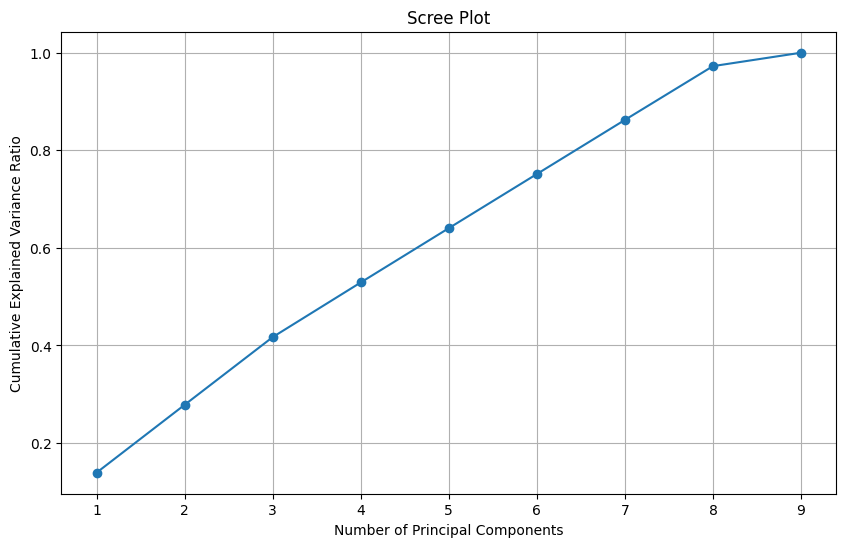

In [245]:
# Calculate the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate the cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Plot the scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.title('Scree Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid()
plt.show()

In [246]:
pca = PCA(n_components=8)  # Select 8 principal components

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [247]:
X_train_pca.shape, X_test_pca.shape

((70000, 8), (30000, 8))

In [248]:
algorithms = [
    LogisticRegression(n_jobs=-1, random_state=42),
    DecisionTreeClassifier(random_state=42),
    KNeighborsClassifier(n_jobs=-1),
    GaussianNB(),
    AdaBoostClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42),
    RandomForestClassifier(n_jobs=-1, random_state=42),
    XGBClassifier(n_jobs=-1, random_state=42),
    SVC(random_state=42)
]

# Initialize the results dictionary for training data
results_train = {
    'Algorithm': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-score': [],
    'Building Time (s)': []
}

# Apply the algorithms and calculate performance metrics for training data using X_train_pca
for algorithm in algorithms:
    start_time = time.time()  # Start timer

    algorithm_name = type(algorithm).__name__
    algorithm.fit(X_train_pca, y_train)
    y_train_pred = algorithm.predict(X_train_pca)

    accuracy = accuracy_score(y_train, y_train_pred)
    precision = precision_score(y_train, y_train_pred, average='weighted')
    recall = recall_score(y_train, y_train_pred, average='weighted')
    f1 = f1_score(y_train, y_train_pred, average='weighted')

    end_time = time.time()  # End timer
    building_time = end_time - start_time

    results_train['Algorithm'].append(algorithm_name)
    results_train['Accuracy'].append(accuracy)
    results_train['Precision'].append(precision)
    results_train['Recall'].append(recall)
    results_train['F1-score'].append(f1)
    results_train['Building Time (s)'].append(building_time)

# Create a DataFrame for the training data results
df_train = pd.DataFrame(results_train)
df_train

,Algorithm,Accuracy,Precision,Recall,F1-score,Building Time (s)
0,LogisticRegression,0.504043,0.503983,0.504043,0.502486,3.019586
1,DecisionTreeClassifier,1.000000,1.000000,1.000000,1.000000,4.425422
2,KNeighborsClassifier,0.688157,0.688157,0.688157,0.688157,3.535717
3,GaussianNB,0.505600,0.505607,0.505600,0.501428,0.176282
4,AdaBoostClassifier,0.504443,0.528289,0.504443,0.365366,6.457694
5,GradientBoostingClassifier,0.539686,0.540777,0.539686,0.536052,30.670619
6,RandomForestClassifier,1.000000,1.000000,1.000000,1.000000,30.084640
7,XGBClassifier,0.693443,0.693461,0.693443,0.693429,2.993537
8,SVC,0.522314,0.522583,0.522314,0.520167,650.693718


In [249]:
results_test = {
    'Algorithm': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-score': []
}

# Apply the algorithms and calculate performance metrics for test data using X_test_pca
for algorithm in algorithms:
    algorithm_name = type(algorithm).__name__
    y_test_pred = algorithm.predict(X_test_pca)

    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, average='weighted')
    recall = recall_score(y_test, y_test_pred, average='weighted')
    f1 = f1_score(y_test, y_test_pred, average='weighted')

    results_test['Algorithm'].append(algorithm_name)
    results_test['Accuracy'].append(accuracy)
    results_test['Precision'].append(precision)
    results_test['Recall'].append(recall)
    results_test['F1-score'].append(f1)

# Create a DataFrame for the test data results
df_test = pd.DataFrame(results_test)
df_test

,Algorithm,Accuracy,Precision,Recall,F1-score
0,LogisticRegression,0.503633,0.503159,0.503633,0.502126
1,DecisionTreeClassifier,0.495600,0.495610,0.495600,0.495605
2,KNeighborsClassifier,0.496733,0.496756,0.496733,0.496742
3,GaussianNB,0.503667,0.502901,0.503667,0.499713
4,AdaBoostClassifier,0.506000,0.509848,0.506000,0.367540
5,GradientBoostingClassifier,0.502233,0.501418,0.502233,0.498211
6,RandomForestClassifier,0.497167,0.496982,0.497167,0.496917
7,XGBClassifier,0.499367,0.499333,0.499367,0.499344
8,SVC,0.502567,0.501929,0.502567,0.500022


In [250]:
x = df_cleaned.drop("Churn",axis=1)
y = df_cleaned['Churn']

In [251]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [252]:
X_train.shape, X_test.shape

((70000, 9), (30000, 9))

In [253]:
X_train.columns

Index(['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB',
       'Gender_Male', 'Location_Houston', 'Location_Los Angeles',
       'Location_Miami', 'Location_New York'],
      dtype='object')

In [254]:
columns_to_scale = ['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB']

scaler = MinMaxScaler()

X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])

X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

In [255]:
# Initialize the XGBoost classifier
xgb_classifier = XGBClassifier(
    objective='binary:logistic',  # For binary classification
    random_state=42               # Random seed for reproducibility
)

# Train (fit) the model
xgb_classifier.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [256]:
y_train_pred = xgb_classifier.predict(X_train)
y_test_pred = xgb_classifier.predict(X_test)

# Calculate metrics for train set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

# Calculate metrics for test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

# Create a DataFrame to store the results
results = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Train': [train_accuracy, train_precision, train_recall, train_f1],
    'Test': [test_accuracy, test_precision, test_recall, test_f1]
})

results

,Metric,Train,Test
0,Accuracy,0.671286,0.497367
1,Precision,0.672974,0.492122
2,Recall,0.663880,0.485924
3,F1-Score,0.668396,0.489003


In [257]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning

param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [50, 100, 150]
}

In [258]:
# Initialize GridSearchCV with recall as the scoring metric
grid_search = GridSearchCV(
    estimator=xgb_classifier,
    param_grid=param_grid,
    scoring='recall',
    cv=5
)

# Fit the GridSearchCV on the training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [50, 100, 150]},
             scoring='recall')

In [259]:
# Get the best model from the search
best_xgb = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_test_pred = best_xgb.predict(X_test)

# Calculate recall for the test set
test_recall = recall_score(y_test, y_test_pred)

print("Best Parameters:", grid_search.best_params_)
print("Test Recall with Best Model:", test_recall)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150}
Test Recall with Best Model: 0.48430765086206895


In [260]:
#cross validation of accuracy

from sklearn.model_selection import cross_val_score

scores = cross_val_score(xgb_classifier, X_train, y_train, cv=5, scoring='accuracy',n_jobs=-1)

print("Cross-Validation Scores (Accuracy):", scores)
print()
print("Mean Accuracy Score:", scores.mean())

Cross-Validation Scores (Accuracy): [0.50014286 0.4995     0.49857143 0.50128571 0.51042857]

Mean Accuracy Score: 0.5019857142857143


In [261]:
#cross validation of recall

scores = cross_val_score(xgb_classifier, X_train, y_train, cv=5, scoring='recall',n_jobs=-1)

print("Cross-Validation Scores (Recall):", scores)
print()
print("Mean Recall Score:", scores.mean())

Cross-Validation Scores (Recall): [0.49363103 0.49441741 0.49885485 0.49914114 0.49370169]

Mean Recall Score: 0.49594922327428986


In [262]:
#creating a dataframe of probabilites, actual labels, predicted labels for genral check

probabilities = xgb_classifier.predict_proba(X_train)

predicted_labels = xgb_classifier.predict(X_train)

results = pd.DataFrame({'Probability': probabilities[:, 1],
                        'Actual_Label': y_train,
                        'Predicted_Label': predicted_labels})

results.sample(10)

,Probability,Actual_Label,Predicted_Label
53860,0.440853,1,0
81709,0.540448,0,1
7147,0.395186,1,0
69410,0.569054,0,1
97135,0.520832,1,1
24431,0.583327,0,1
76994,0.544934,1,1
92331,0.544314,1,1
75138,0.467121,1,0
68681,0.481921,1,0


In [263]:
#check evaulation metrics for different thresholds

thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# Creating an empty DataFrame to store the evaluation metrics
metrics_df = pd.DataFrame(columns=['Probability', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Iterating over the probability thresholds
for threshold in thresholds:
    # Converting probabilities to predicted labels based on the threshold
    predicted_labels = (probabilities[:, 1] >= threshold).astype(int)

    # Calculating evaluation metrics
    accuracy = accuracy_score(y_train, predicted_labels)
    precision = precision_score(y_train, predicted_labels, zero_division=1)
    recall = recall_score(y_train, predicted_labels, zero_division=1)
    f1 = f1_score(y_train, predicted_labels, zero_division=1)

    # Adding the metrics to the DataFrame
    metrics_df = pd.concat([metrics_df, pd.DataFrame({'Probability': [threshold],
                                                      'Accuracy': [accuracy],
                                                      'Precision': [precision],
                                                      'Recall': [recall],
                                                      'F1 Score': [f1]})], ignore_index=True)
metrics_df

C:\Users\Darshan\AppData\Local\Temp\ipykernel_25136\3333107675.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  metrics_df = pd.concat([metrics_df, pd.DataFrame({'Probability': [threshold],


,Probability,Accuracy,Precision,Recall,F1 Score
0,0.1,0.499186,0.499100,1.000000,0.665866
1,0.2,0.501786,0.500401,1.000000,0.667023
2,0.3,0.517914,0.508637,0.998855,0.674040
3,0.4,0.583114,0.546273,0.971487,0.699316
4,0.5,0.671286,0.672974,0.663880,0.668396
5,0.6,0.584471,0.873371,0.195671,0.319714
6,0.7,0.518900,0.973565,0.036901,0.071107
7,0.8,0.503714,1.000000,0.005468,0.010876
8,0.9,0.501143,1.000000,0.000315,0.000630
9,1.0,0.500986,1.000000,0.000000,0.000000


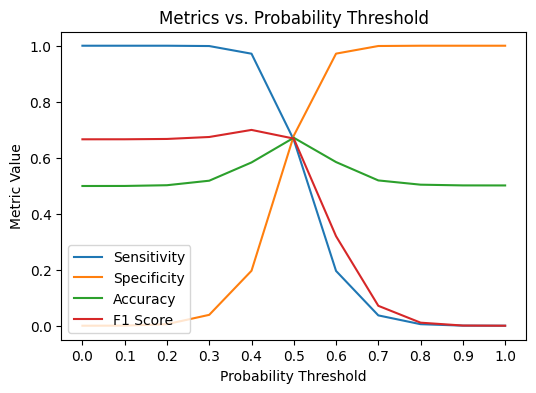

In [264]:
from sklearn.metrics import confusion_matrix

# Calculate predicted probabilities for the train data
train_probabilities = xgb_classifier.predict_proba(X_train)[:, 1]

# Apply different thresholds to obtain binary predictions for train data
thresholds = np.arange(0, 1.1, 0.1)
sensitivity = []
specificity = []
accuracy = []
f1_scores = []

for threshold in thresholds:
    train_predictions = (train_probabilities >= threshold).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_train, train_predictions).ravel()
    sensitivity.append(tp / (tp + fn))
    specificity.append(tn / (tn + fp))
    accuracy.append((tp + tn) / (tp + tn + fp + fn))
    f1_scores.append(f1_score(y_train, train_predictions))

# Plot the sensitivity, specificity, accuracy, and F1 score against probability thresholds
plt.figure(figsize=(6,4))
plt.plot(thresholds, sensitivity, label='Sensitivity')
plt.plot(thresholds, specificity, label='Specificity')
plt.plot(thresholds, accuracy, label='Accuracy')
plt.plot(thresholds, f1_scores, label='F1 Score')
plt.xlabel('Probability Threshold')
plt.xticks(np.arange(0, 1.1, 0.1))
plt.ylabel('Metric Value')
plt.title('Metrics vs. Probability Threshold')
plt.legend(loc='lower left')
plt.show()

In [265]:
# Calculate evaluation metrics for train data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='macro')
train_recall = recall_score(y_train, y_train_pred, average='macro')
train_f1_score = f1_score(y_train, y_train_pred, average='macro')

# Predict on the test data
y_test_pred = xgb_classifier.predict(X_test)

# Calculate evaluation metrics for test data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='macro')
test_recall = recall_score(y_test, y_test_pred, average='macro')
test_f1_score = f1_score(y_test, y_test_pred, average='macro')

# Create a DataFrame to store the evaluation metrics
metrics_data = {
    'Dataset': ['Train', 'Test'],
    'Accuracy': [train_accuracy, test_accuracy],
    'Precision': [train_precision, test_precision],
    'Recall': [train_recall, test_recall],
    'F1-score': [train_f1_score, test_f1_score]
}

metrics_df = pd.DataFrame(metrics_data)
metrics_df

,Dataset,Accuracy,Precision,Recall,F1-score
0,Train,0.671286,0.671311,0.671271,0.671261
1,Test,0.497367,0.497251,0.497252,0.497232


In [266]:
from sklearn.metrics import confusion_matrix

# Calculate predictions for the training set using a threshold of 0.50
train_predictions = (xgb_classifier.predict_proba(X_train)[:, 1] >= 0.50).astype(int)
train_confusion_matrix = confusion_matrix(y_train, train_predictions)

# Calculate predictions for the test set using a threshold of 0.50
test_predictions = (xgb_classifier.predict_proba(X_test)[:, 1] >= 0.50).astype(int)
test_confusion_matrix = confusion_matrix(y_test, test_predictions)

# Calculate the total number of samples in each set
train_total = len(y_train)
test_total = len(y_test)

# Calculate the confusion matrix in percentage form for the training set
train_confusion_matrix_percent = train_confusion_matrix / train_total * 100

# Calculate the confusion matrix in percentage form for the test set
test_confusion_matrix_percent = test_confusion_matrix / test_total * 100

# Create a dataframe for the confusion matrix
confusion_matrix_df = pd.DataFrame({'Training Set': train_confusion_matrix_percent.flatten(),
                                    'Test Set': test_confusion_matrix_percent.flatten()},
                                   index=['True Positive (%)', 'True Negative (%)', 'False Positive (%)', 'False Negative (%)', ])
#
confusion_matrix_df

,Training Set,Test Set
True Positive (%),34.000000,25.686667
True Negative (%),16.098571,24.820000
False Positive (%),16.772857,25.443333
False Negative (%),33.128571,24.050000


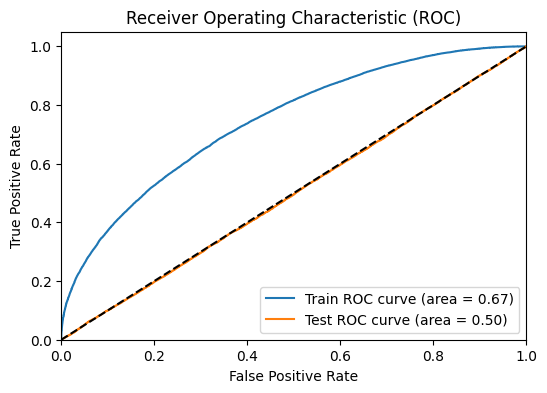

In [267]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Calculate predicted probabilities for the train data
train_probabilities = xgb_classifier.predict_proba(X_train)[:, 1]

# Apply the threshold of 0.50 to obtain binary predictions for train data
train_predictions = (train_probabilities >= 0.50).astype(int)

# Calculate the false positive rate, true positive rate, and thresholds for train data
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, train_probabilities)

# Calculate the ROC-AUC score for train data
roc_auc_train = roc_auc_score(y_train, train_predictions)

# Calculate predicted probabilities for the test data
test_probabilities = xgb_classifier.predict_proba(X_test)[:, 1]

# Apply the threshold of 0.50 to obtain binary predictions for test data
test_predictions = (test_probabilities >= 0.50).astype(int)

# Calculate the false positive rate, true positive rate, and thresholds for test data
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, test_probabilities)

# Calculate the ROC-AUC score for test data
roc_auc_test = roc_auc_score(y_test, test_predictions)

# Plot the ROC curves
plt.figure(figsize=(6,4))
plt.plot(fpr_train, tpr_train, label='Train ROC curve (area = {:.2f})'.format(roc_auc_train))
plt.plot(fpr_test, tpr_test, label='Test ROC curve (area = {:.2f})'.format(roc_auc_test))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [268]:
feature_importance_df

,Feature,Importance
0,Monthly_Bill,0.316383
1,Total_Usage_GB,0.290353
2,Age,0.194396
3,Subscription_Length_Months,0.142624
4,Gender_Male,0.016683
5,Location_Los Angeles,0.010595
6,Location_Houston,0.010007
7,Location_Miami,0.009792
8,Location_New York,0.009166


In [269]:
import joblib


joblib.dump(xgb_classifier, 'customer_churn_classifier.pkl')

['customer_churn_classifier.pkl']